<a href="https://colab.research.google.com/github/DavidT005/CUFICO_2019_2/blob/master/Chi2FittingDavid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

### 2. Mount the drive to get the root binary and untar it 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Oct 25 16:58 sample_data
drwx------  4 root root 4.0K Nov  7 11:35 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
BackgroundModel = ROOT.TH1F( 'bkg', 'My background model', 20, 50, 1050 )#Creates a 1d hist

In [0]:
expde = ROOT.TF1("expde","([2]*expo)+[3]",50,1050)#creates an exponential function with extra parameters for the background signals
expde.SetParameters(0.0,-0.005,100,0.0);#sets the values of each parameter

In [0]:
BackgroundModel.FillRandom("expde",100000)#Fills the histogram with a random backgroung signal

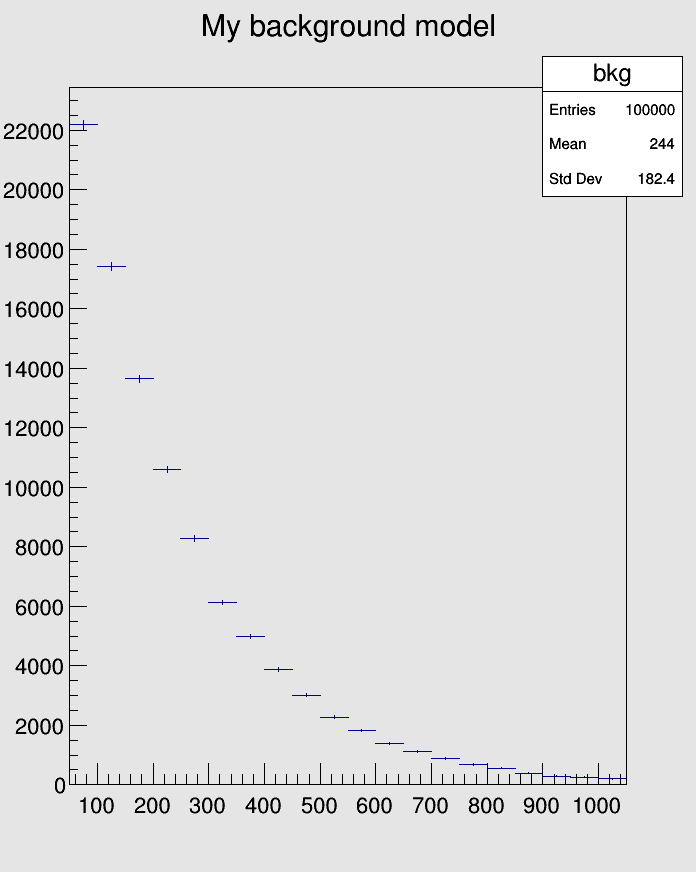

In [0]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )#crates a canvas to draw on
c1.SetFillColor( 18 )#makes the canvas gray
BackgroundModel.Draw('E')#Draws with error bars
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

In [0]:
SignalModel = ROOT.TH1F( 'sig', 'My signal model', 20, 50, 1050 )#Creates a 1D histogram

In [0]:
signal = ROOT.TF1("signal", "gaus", 50, 1050) #crates a gaussian function
signal.SetParameters(1.0,500.0,50.0)#sets the parameters of the function

In [0]:
SignalModel.FillRandom("signal",1000)#generates 1000 random groups of data for the histogram using gaussian distribution

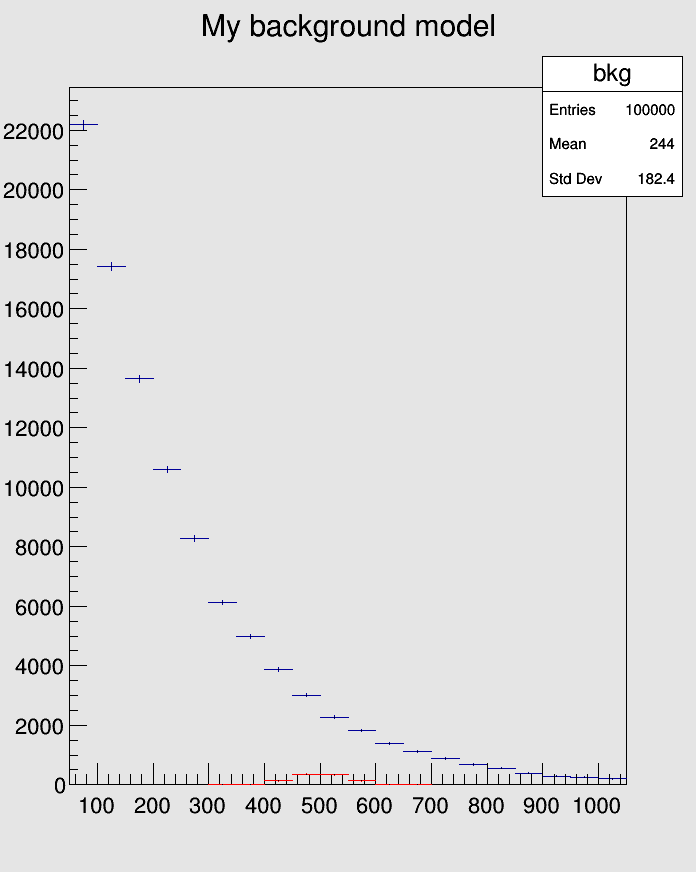

In [0]:
SignalModel.Draw('same E')#Draws on the same canvas and with error bars
SignalModel.SetLineColor(2)
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
BkgpSigModel = BackgroundModel.Clone("bkgpsig")#Creates a copy of this histogram called "background plus signal"

In [0]:
BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
#BkgpSigModel.Add(SignalModel,10)#Adds to BkgpSigModel the values of SignalModel times 10
BkgpSigModel.Add(SignalModel,10)#Adds to BkgpSigModel the values of SignalModel times 10

True

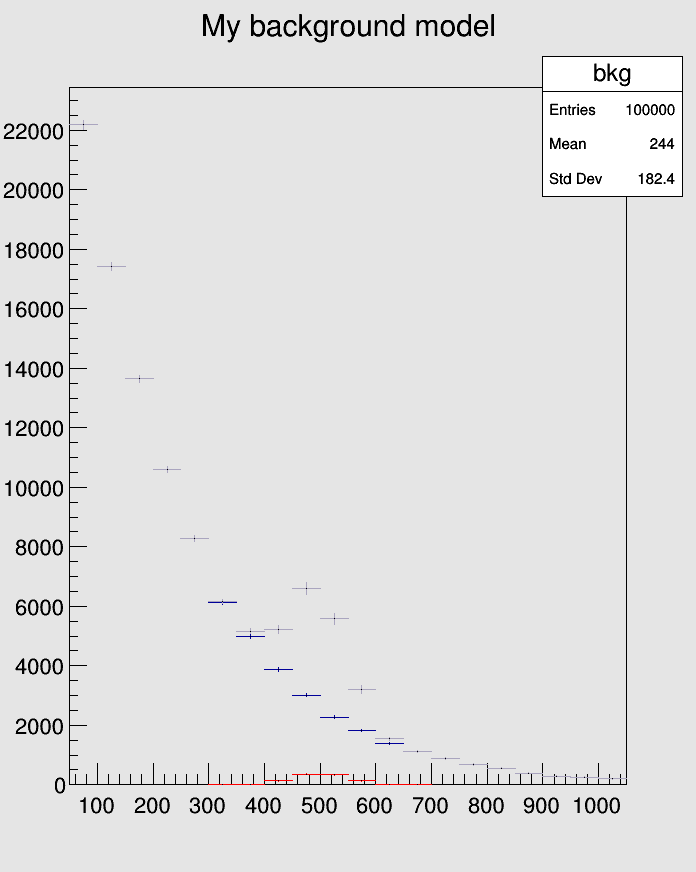

In [0]:
BkgpSigModel.SetLineColor(40)
BackgroundModel.Draw("E")
SignalModel.Draw("E same")
BkgpSigModel.Draw("E same")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
DataFile = ROOT.TFile("/content/drive/Shared drives/PyROOT_in_Google/Data5.root","read")

In [0]:
DataHisto=DataFile.Get('data')

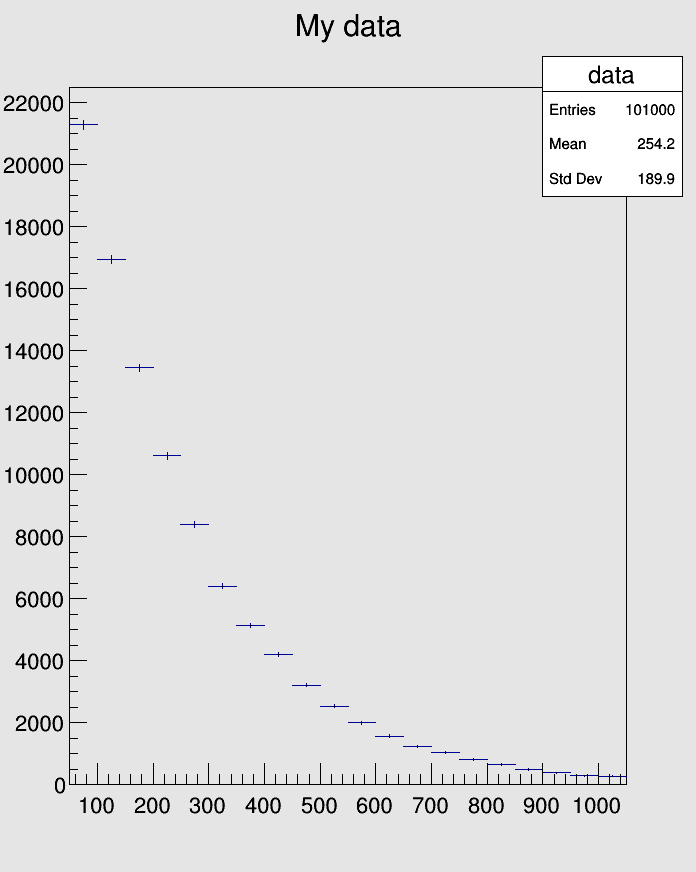

In [0]:
DataHisto.Draw("E")
c1.Update()
gROOT.GetListOfCanvases().Draw()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

print(DataHisto.GetSize()) #Returns number of bins

for i in range(0,DataHisto.GetSize()):

  print("bin: ",i," val: ",DataHisto.GetBinContent(i))#Prints the bin to check if there are not zero values
#The first an last bins are for values that fell off out of the histogram so we can skip them

22
bin:  0  val:  0.0
bin:  1  val:  21289.0
bin:  2  val:  16962.0
bin:  3  val:  13451.0
bin:  4  val:  10612.0
bin:  5  val:  8408.0
bin:  6  val:  6407.0
bin:  7  val:  5132.0
bin:  8  val:  4215.0
bin:  9  val:  3219.0
bin:  10  val:  2541.0
bin:  11  val:  2006.0
bin:  12  val:  1568.0
bin:  13  val:  1230.0
bin:  14  val:  1036.0
bin:  15  val:  825.0
bin:  16  val:  655.0
bin:  17  val:  495.0
bin:  18  val:  382.0
bin:  19  val:  297.0
bin:  20  val:  270.0
bin:  21  val:  0.0


In [0]:
def get_chi_squared(fit,data): #Recives two ROOT histograms and returns the chi_squared for the fit
  number_bins = data.GetSize()#gets the number of bins in the data histogram
  chi_squared = 0#sets the initial value of chi as zero
  for i in range(0+1,number_bins-1):#iterates over al the posible indexes of the histograms except the fall-offs
    chi_squared += ((data.GetBinContent(i)-fit.GetBinContent(i))**2)/data.GetBinContent(i)#Calculates what must be added to the sum
  
  return chi_squared#returns chi squared


In [0]:
get_chi_squared(BkgpSigModel,DataHisto)#Uses the defined function for these two histograms as a test

236.96197247618304

In [0]:
mus = np.linspace(-5,5,1000)
chis = np.array([])

for mu in mus: #Iterates over all the given mus and calculates chi squared for each one
  BkgpSigModel = BackgroundModel.Clone("bkgpsig") #Creates a copy of this histogram called "background plus signal"
  BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
  BkgpSigModel.Add(SignalModel,mu)#Adds to BkgpSigModel the values of SignalModel times mu
  chi = get_chi_squared(BkgpSigModel,DataHisto)
  chis = np.append(chis,chi)

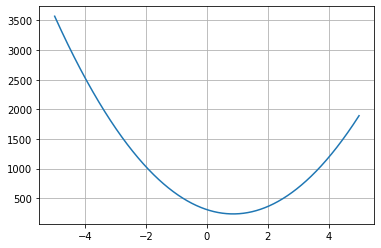

In [0]:
plt.plot(mus,chis)#PLots the Chi Squared vs Mu
plt.grid()
plt.show()

In [0]:
mus = np.linspace(-0.5,1.5,1000)
chis = np.array([])

for mu in mus:#Does the same iteration for a narrower space of Mus
  BkgpSigModel = BackgroundModel.Clone("bkgpsig") #Creates a copy of this histogram called "background plus signal"
  BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
  BkgpSigModel.Add(SignalModel,mu)#Adds to BkgpSigModel the values of SignalModel times mu
  chi = get_chi_squared(BkgpSigModel,DataHisto)
  chis = np.append(chis,chi)

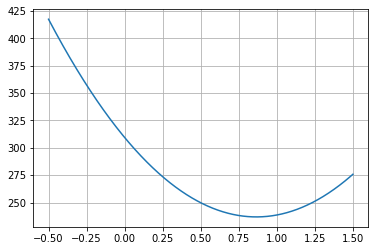

In [0]:
plt.plot(mus,chis)
plt.grid()
plt.show()

In [0]:
mus = np.linspace(0.75,1,1000)
chis = np.array([])

for mu in mus:#Does the same iteration for a narrower space of Mus
  BkgpSigModel = BackgroundModel.Clone("bkgpsig") #Creates a copy of this histogram called "background plus signal"
  BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
  BkgpSigModel.Add(SignalModel,mu)#Adds to BkgpSigModel the values of SignalModel times mu
  chi = get_chi_squared(BkgpSigModel,DataHisto)
  chis = np.append(chis,chi)

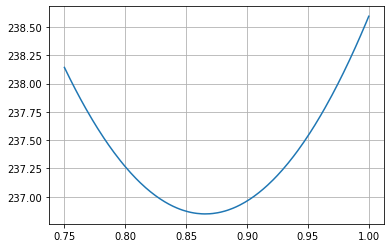

In [0]:
plt.plot(mus,chis)
plt.grid()
plt.show()

In [0]:
mus = np.linspace(0.85,0.90,1000)
chis = np.array([])

for mu in mus:#Does the same iteration for a narrower space of Mus
  BkgpSigModel = BackgroundModel.Clone("bkgpsig") #Creates a copy of this histogram called "background plus signal"
  BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
  BkgpSigModel.Add(SignalModel,mu)#Adds to BkgpSigModel the values of SignalModel times mu
  chi = get_chi_squared(BkgpSigModel,DataHisto)
  chis = np.append(chis,chi)

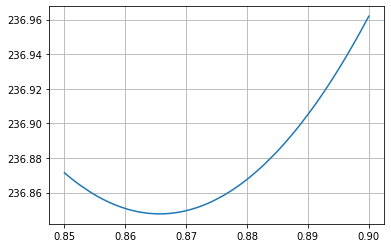

In [0]:
plt.plot(mus,chis)
plt.grid()
plt.show()

In [0]:
'''CONCLUSIÓN'''
'''El mu que minimiza el chi cuadrado está entre 0.86 y 0.87'''

'El mu que minimiza el chi cuadrado está entre 0.86 y 0.87'

In [0]:
BkgpSigModel = BackgroundModel.Clone("bkgpsig") #Creates a copy of this histogram called "background plus signal"
BkgpSigModel.Sumw2() #Creates a structure to store the sum of the square of the weights
BkgpSigModel.Add(SignalModel,mu)#Adds to BkgpSigModel the values of SignalModel times mu


True

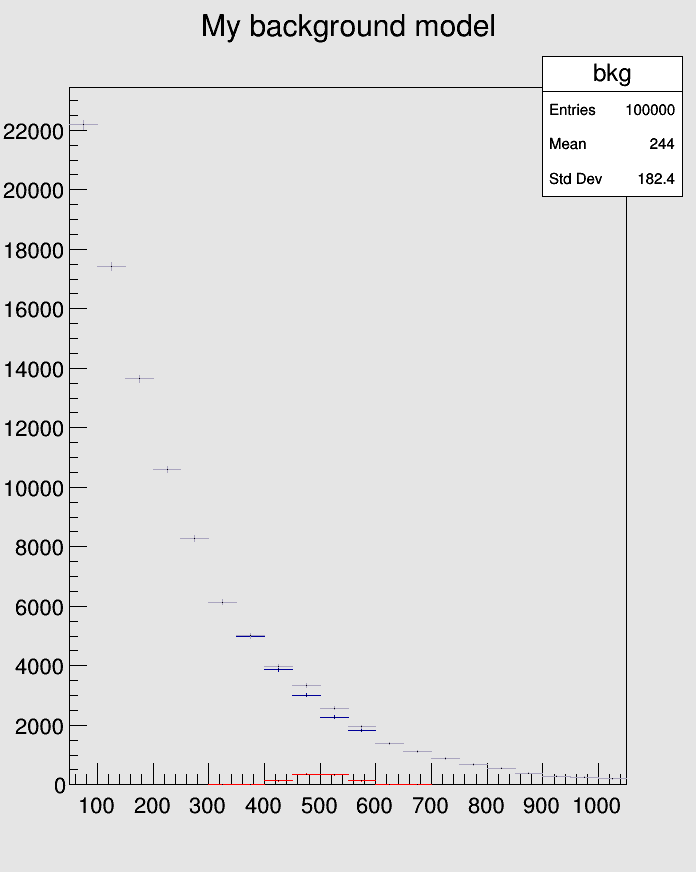

In [0]:
BkgpSigModel.SetLineColor(40)
BackgroundModel.Draw("E")
SignalModel.Draw("E same")
BkgpSigModel.Draw("E same")
c1.Update()
gROOT.GetListOfCanvases().Draw()